# Assessment 2

## Task 1: Develop learning-based model(s) for Classification

In [1]:
# TensorFlow config to GPU
import tensorflow as tf
print(tf.__version__)

gpus = tf.config.list_physical_devices('GPU')
if gpus: 
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=15292)]
    )

logical_gpus = tf.config.list_logical_devices('GPU')
print(logical_gpus)
print(len(gpus), "Physical GPU,", len(logical_gpus), "Logical GPUs")


from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

print()
print()

import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2.6.0
[LogicalDevice(name='/device:GPU:0', device_type='GPU')]
1 Physical GPU, 1 Logical GPUs
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8707722222192318641
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 16034824192
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8088543449005111868
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


Num GPUs Available:  1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import auc


In [3]:
train_df = pd.read_csv('ECG_dataset/train.csv', header=None)
test_df = pd.read_csv('ECG_dataset/test.csv', header=None)
validation_df = pd.read_csv('ECG_dataset/validation.csv', header=None)

In [4]:
print(train_df.shape)
print(test_df.shape)
print(validation_df.shape)

(1081, 141)
(180, 141)
(541, 141)


We will be using train_df as our training data and validation_df as our validation data. We will be using test_df as our test data.

In [5]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,1,0.024133,0.016065,0.044639,0.031001,-0.009473,-0.042663,-0.077283,-0.091508,-0.046114,...,0.051275,0.061244,0.053409,0.12092,0.081996,0.039526,0.073486,0.020875,-0.018836,0.030809
1,0,0.424380,0.344420,0.348130,0.340170,0.243370,0.241730,0.268780,0.273420,0.356440,...,0.526440,0.559020,0.555670,0.59727,0.570760,0.467490,0.463400,0.481880,0.432190,0.394530
2,0,1.529500,1.776600,1.936700,1.840200,1.800000,1.724900,1.405800,1.008800,0.724720,...,0.169600,0.126170,0.258300,0.23859,0.465590,0.640280,0.727650,0.867870,1.058600,1.295300
3,0,1.286500,1.049900,0.793600,0.473590,0.111730,-0.054857,-0.062095,-0.120750,-0.103010,...,0.966370,1.106500,1.091900,1.30260,1.572700,1.733700,1.740600,1.711700,1.579300,1.514100
4,1,-0.175400,-0.121920,-0.053532,-0.024293,0.022917,0.116440,0.187040,0.240710,0.314340,...,-0.234150,-0.248470,-0.177590,-0.22301,-0.277270,-0.233280,-0.252610,-0.264220,-0.176390,-0.154930


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1081 entries, 0 to 1080
Columns: 141 entries, 0 to 140
dtypes: float64(140), int64(1)
memory usage: 1.2 MB


In [7]:
train_df.shape

(1081, 141)

The first column of the data is the label. The remaining columns are the features. The features are the different ECG signals. The label is the class of the ECG signal. The classes are:
- 0 (not having a cardiovascular disease)
- 1 (having a cardiovascular disease)

Aim is to build a model that can predict the class of the ECG signal. This can be formulated as a binary classification problem.

<AxesSubplot:xlabel='0', ylabel='count'>

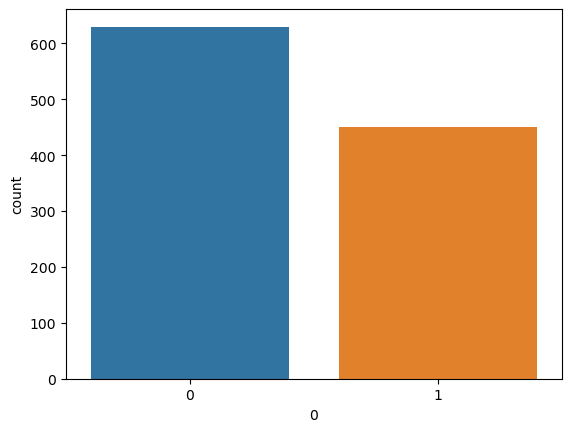

In [9]:
# plot countplot for first column
sns.countplot(x=0, data=train_df)

In [10]:
#Showing the info of train and test data
print('#############Train data#############')
print(train_df.info())
print('#############Test data#############')
print(test_df.info())
#taking a sample of the test data (for reasons of plotting later)
sample = train_df.sample(25)
sampleX= sample.iloc[:,1:]
sampleY=sample.iloc[:,0]
print('#############Sample Info#############')
print(sampleX.info())

#############Train data#############
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1081 entries, 0 to 1080
Columns: 141 entries, 0 to 140
dtypes: float64(140), int64(1)
memory usage: 1.2 MB
None
#############Test data#############
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Columns: 141 entries, 0 to 140
dtypes: float64(140), int64(1)
memory usage: 198.4 KB
None
#############Sample Info#############
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 10 to 327
Columns: 140 entries, 1 to 140
dtypes: float64(140)
memory usage: 27.5 KB
None


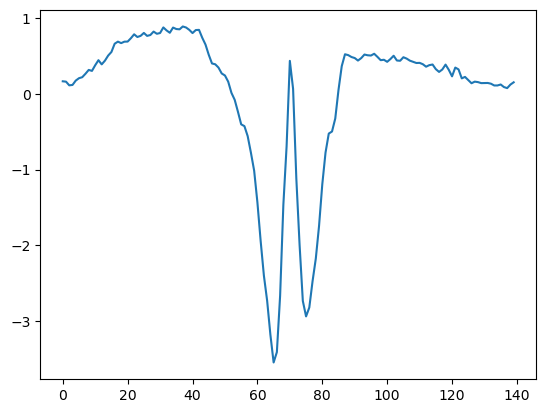

In [11]:
import matplotlib.pyplot as plt
plt.plot(np.array(range(0,140)),sampleX.iloc[10])

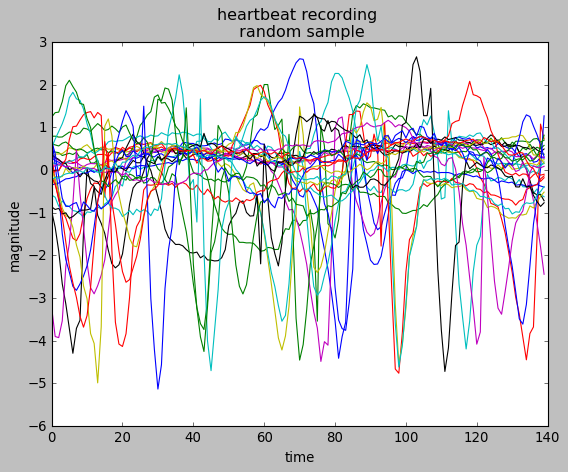

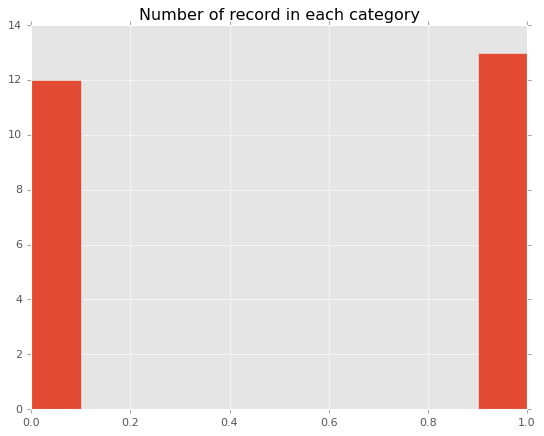

In [12]:
#ploting sample data information

plt.style.use('classic')
#ploting the samples
for index, row in sampleX.iterrows():
    plt.plot(np.array(range(0,140)), row)
    
plt.xlabel('time')
plt.ylabel('magnitude')
plt.title("heartbeat recording \n random sample")
plt.show()



plt.style.use('ggplot')
plt.title("Number of record in each category")
plt.hist(sample.iloc[:,0].transpose())
plt.show()

In [13]:
#number of labels for train and test
print("Train data")
print("Type\tCount")
print(train_df.iloc[:,0].value_counts())
print('####################################')
print("Test data")
print("Type\tCount")
print(test_df.iloc[:,0].value_counts())

Train data
Type	Count
0    630
1    451
Name: 0, dtype: int64
####################################
Test data
Type	Count
0    102
1     78
Name: 0, dtype: int64


The models that we will be using are:
- Naive Bayes Classifier
- K-Nearest Neighbors Classifier
- Ensemble Learning Classifier
- Support Vector Machine Classifier

Then we will compare the performance of the models and select the best model for the task.

In [8]:
# split the data into X_train and y_train, X_test and y_test
X_train = train_df.iloc[:, 1:]
y_train = train_df.iloc[:, 0]

X_valid = validation_df.iloc[:, 1:]
y_valid = validation_df.iloc[:, 0]

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

After splitting the data into training and validation sets, we need to scale the data. We will be using StandardScaler for this purpose.

### 1. Naive Bayes Classifier

Accuracy:  0.49353049907578556
F1 score:  0.4922838801304605
Confusion matrix:  [[159 130]
 [144 108]]
Average precision-recall score: 0.46


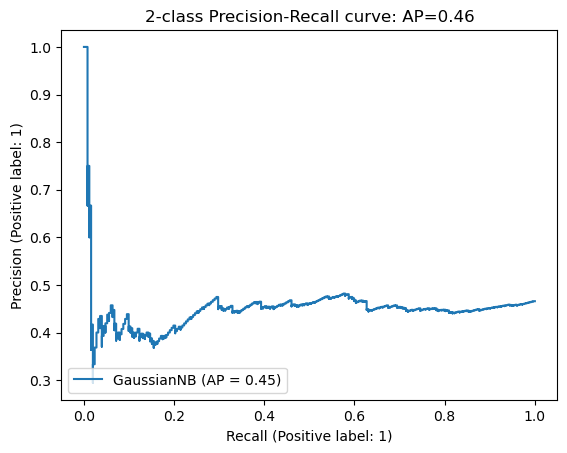

In [66]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB


# Fit the model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict the model
y_pred_gnb = gnb.predict(X_valid)

# Evaluate the model
print("Accuracy: ", accuracy_score(y_valid, y_pred_gnb))
print("F1 score: ", f1_score(y_valid, y_pred_gnb, average='weighted'))
print("Confusion matrix: ", confusion_matrix(y_valid, y_pred_gnb))

# Precision and recall and Area under the curv

disp = plot_precision_recall_curve(gnb, X_valid, y_valid)
disp.ax_.set_title('2-class Precision-Recall curve: '
                     'AP={0:0.2f}'.format(average_precision_score(y_valid, y_pred_gnb)))

# Area under the curve
average_precision = average_precision_score(y_valid, y_pred_gnb)
print('Average precision-recall score: {0:0.2f}'.format(
        average_precision))

The naive Bayes classifier is a simple probabilistic classifier based on applying Bayes' theorem with strong (naive) independence assumptions between the features. A Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. For example, a fruit may be considered to be an apple if it is red, round, and about 3 inches in diameter. A Naive Bayes classifier considers each of these features to contribute independently to the probability that this fruit is an apple, regardless of any possible correlations between the color, roundness, and diameter features.

Gaussian Naive Bayes is used when the data is normally distributed. It is assumed that the data follows a normal distribution. Inorder to use Gaussian Naive Bayes, we need to convert the data into a normal distribution.

This model gave an accuracy of 0.49 on the validation set which is not good.

### 2. K-Nearest Neighbors Classifier

Accuracy:  0.9685767097966729
F1 score:  0.968593948287203
Confusion matrix:  [[278  11]
 [  6 246]]
Average precision-recall score: 0.95


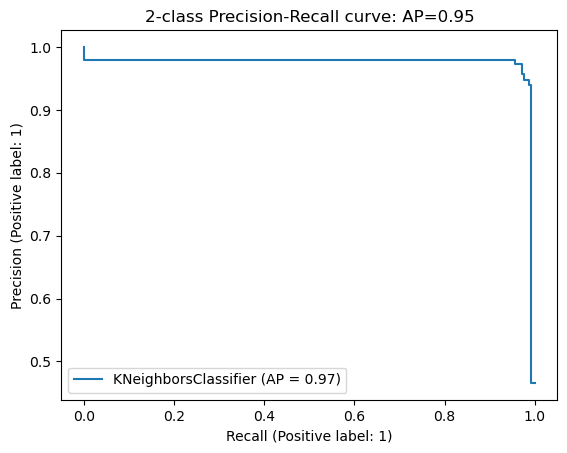

In [67]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

# Fit the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict the model
y_pred_knn = knn.predict(X_valid)

# Evaluate the model
print("Accuracy: ", accuracy_score(y_valid, y_pred_knn))
print("F1 score: ", f1_score(y_valid, y_pred_knn, average='weighted'))
print("Confusion matrix: ", confusion_matrix(y_valid, y_pred_knn))

# Precision and recall and Area under the curv

disp = plot_precision_recall_curve(knn, X_valid, y_valid)
disp.ax_.set_title('2-class Precision-Recall curve: '
                        'AP={0:0.2f}'.format(average_precision_score(y_valid, y_pred_knn)))

# Area under the curve
average_precision = average_precision_score(y_valid, y_pred_knn)
print('Average precision-recall score: {0:0.2f}'.format(
        average_precision))

KNN (K-Nearest Neighbors) is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). KNN has been used in statistical estimation and pattern recognition already in the beginning of 1970's as a non-parametric technique. The algorithm is among the simplest of all machine learning algorithms.

In KNN, the hyperparameter K is the number of nearest neighbors to be considered. The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.

This k value is a hyperparameter that we need to tune. We will be using GridSearchCV to find the best value of k.

[0.9824159021406726, 0.9731736323479444, 0.9722477064220184, 0.9731736323479444, 0.9731651376146789, 0.9759429153924566, 0.9731651376146789, 0.971313285762827, 0.970387359836901, 0.9694614339109752, 0.9676095820591233, 0.9676095820591233, 0.9666836561331975, 0.9676095820591234, 0.9657662249405368, 0.963914373088685, 0.9611365953109073, 0.9611365953109073, 0.9611365953109073, 0.9620625212368331, 0.9620625212368333, 0.9611365953109073, 0.9611365953109072, 0.9611365953109073, 0.9611365953109073, 0.9611365953109073, 0.9629884471627591, 0.9620625212368331, 0.9611365953109072, 0.9592847434590555]

0.9824159021406726
1


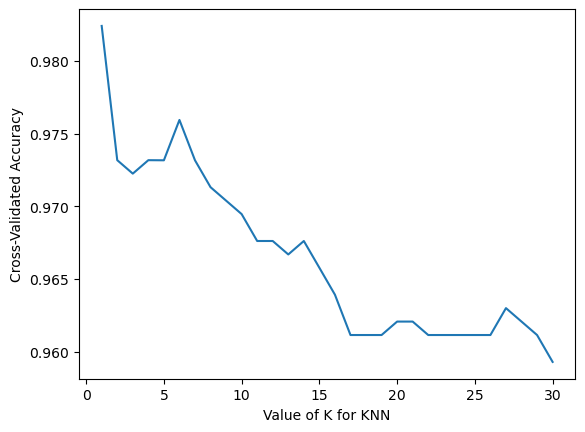

In [27]:
# using cross validation to find the best k
from sklearn.model_selection import cross_val_score


# search for an optimal value of K for KNN
k_range = range(1, 31)
k_scores = []
k_values = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_values.append(k)
    k_scores.append(scores.mean())
print(k_scores)

print()
print(max(k_scores))
optimal_k = k_values[k_scores.index(max(k_scores))]
print(optimal_k)

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

Accuracy:  0.9815157116451017
F1 score:  0.9815201510808478
Confusion matrix:  [[283   6]
 [  4 248]]
Average precision-recall score: 0.97


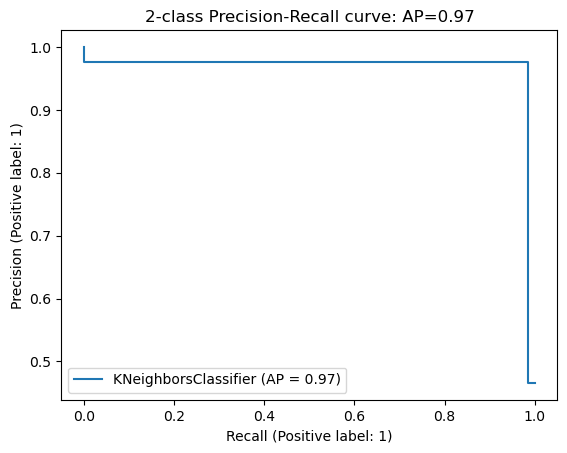

In [68]:
# Create a new KNN model with the optimal k
knn = KNeighborsClassifier(n_neighbors=optimal_k)

# Fit the model
knn.fit(X_train, y_train)

# Predict the model
y_pred_knn = knn.predict(X_valid)

# Evaluate the model
print("Accuracy: ", accuracy_score(y_valid, y_pred_knn))
print("F1 score: ", f1_score(y_valid, y_pred_knn, average='weighted'))
print("Confusion matrix: ", confusion_matrix(y_valid, y_pred_knn))

# Precision and recall and Area under the curv

disp = plot_precision_recall_curve(knn, X_valid, y_valid)
disp.ax_.set_title('2-class Precision-Recall curve: '
                        'AP={0:0.2f}'.format(average_precision_score(y_valid, y_pred_knn)))

# Area under the curve
average_precision = average_precision_score(y_valid, y_pred_knn)
print('Average precision-recall score: {0:0.2f}'.format(
        average_precision))

Cross validation helped us to find the best value of k. The best value of k is 1. This model gave an accuracy of 96% when k was set to 5. Now that we have found the best value of k, it gave an accuracy of 98% on the validation set.

### 3. Ensemble Learning Classifier

Ensemble learning is a machine learning paradigm where multiple models, such as classifiers or experts, are strategically generated and combined to solve a particular computational intelligence problem. Ensemble methods use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone.

We will be using the following ensemble learning models:

- Bagging Classifier : A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

- Random Forest Classifier : A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).

- AdaBoost Classifier : AdaBoost (Adaptive Boosting) is a machine learning meta-algorithm formulated by Yoav Freund and Robert Schapire. It is a boosting algorithm that can be used to convert weak learners to strong ones. It is one of the most popular boosting algorithms. It is used in a variety of areas including computer vision and speech recognition.

- Gradient Boosting Classifier : Gradient Boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.


Accuracy:  0.9611829944547134
F1 score:  0.9611276875860413
Confusion matrix:  [[283   6]
 [ 15 237]]
Average precision-recall score: 0.94


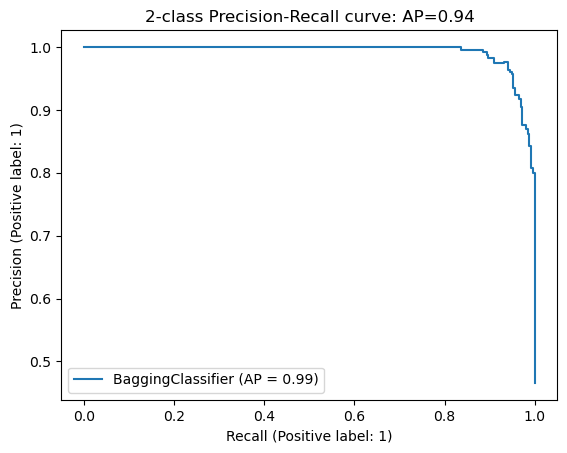

In [69]:
# Bagging Classifier
from sklearn.ensemble import BaggingClassifier

# fit the model
bagging = BaggingClassifier(n_estimators=100, max_samples=0.5, max_features=0.5)
bagging.fit(X_train, y_train)

# Predict the model
y_pred_bagging = bagging.predict(X_valid)

# Evaluate the model
print("Accuracy: ", accuracy_score(y_valid, y_pred_bagging))
print("F1 score: ", f1_score(y_valid, y_pred_bagging, average='weighted'))
print("Confusion matrix: ", confusion_matrix(y_valid, y_pred_bagging))

# Precision and recall and Area under the curv

disp = plot_precision_recall_curve(bagging, X_valid, y_valid)
disp.ax_.set_title('2-class Precision-Recall curve: '  
                        'AP={0:0.2f}'.format(average_precision_score(y_valid, y_pred_bagging)))                                     

# Area under the curve
average_precision = average_precision_score(y_valid, y_pred_bagging)            
print('Average precision-recall score: {0:0.2f}'.format(    
        average_precision))

In [34]:
# implementing cross validation to find the best n_estimators, max_samples and max_features using GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_samples': [0.5, 0.6, 0.7, 0.8, 0.9],
    'max_features': [0.5, 0.6, 0.7, 0.8, 0.9]
}

# Create a based model
bagging = BaggingClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=bagging, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# print the best parameters
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 3 folds for each of 125 candidates, totalling 375 fits
{'max_features': 0.6, 'max_samples': 0.9, 'n_estimators': 300}
0.9491022878834512
BaggingClassifier(max_features=0.6, max_samples=0.9, n_estimators=300)
Accuracy:  0.9648798521256932
F1 score:  0.9648545004581948
Confusion matrix:  [[282   7]
 [ 12 240]]


Accuracy:  0.9630314232902033
F1 score:  0.9630105887658721
Confusion matrix:  [[281   8]
 [ 12 240]]
Average precision-recall score: 0.94


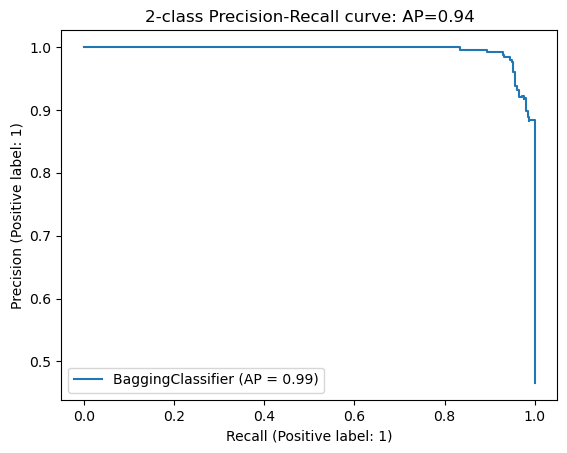

In [72]:
# Create a new Bagging Classifier model with the optimal parameters
bagging = BaggingClassifier(n_estimators=300,
                            max_samples=0.9,
                            max_features=0.6)

# Fit the model
bagging.fit(X_train, y_train)

# Predict the model
y_pred_bagging = bagging.predict(X_valid)

# Evaluate the model
print("Accuracy: ", accuracy_score(y_valid, y_pred_bagging))
print("F1 score: ", f1_score(y_valid, y_pred_bagging, average='weighted'))
print("Confusion matrix: ", confusion_matrix(y_valid, y_pred_bagging))

# Precision and recall and Area under the curv

disp = plot_precision_recall_curve(bagging, X_valid, y_valid)
disp.ax_.set_title('2-class Precision-Recall curve: '
                        'AP={0:0.2f}'.format(average_precision_score(y_valid, y_pred_bagging)))                                         

# Area under the curve
average_precision = average_precision_score(y_valid, y_pred_bagging)
print('Average precision-recall score: {0:0.2f}'.format(
        average_precision))


No big difference in the accuracy of the models while using cross validation with 96% accuracy.

Accuracy:  0.8188539741219963
F1 score:  0.8110658237266908
Confusion matrix:  [[286   3]
 [ 95 157]]
Average precision-recall score: 0.79


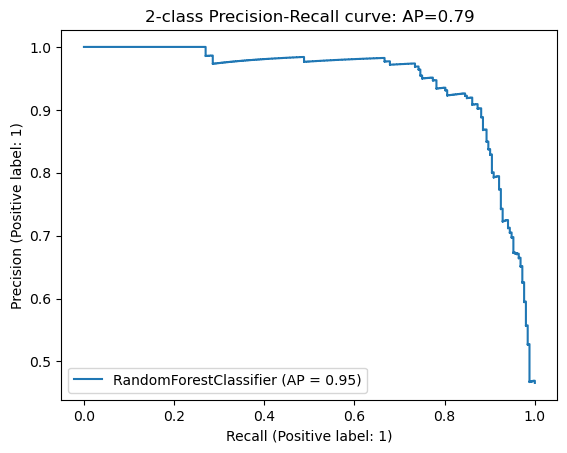

In [73]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# fit the model
rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
rf.fit(X_train, y_train)

# Predict the model
y_pred_rf = rf.predict(X_valid)

# Evaluate the model
print("Accuracy: ", accuracy_score(y_valid, y_pred_rf))
print("F1 score: ", f1_score(y_valid, y_pred_rf, average='weighted'))
print("Confusion matrix: ", confusion_matrix(y_valid, y_pred_rf))

# Precision and recall and Area under the curv

disp = plot_precision_recall_curve(rf, X_valid, y_valid)
disp.ax_.set_title('2-class Precision-Recall curve: '
                        'AP={0:0.2f}'.format(average_precision_score(y_valid, y_pred_rf)))                          
# Area under the curve
average_precision = average_precision_score(y_valid, y_pred_rf)
print('Average precision-recall score: {0:0.2f}'.format(
        average_precision))

In [39]:
# implementing cross validation to find the best n_estimators, max_depth and random_state using GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
}

# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# print the best parameters
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 3 folds for each of 450 candidates, totalling 1350 fits
{'max_depth': 10, 'n_estimators': 300, 'random_state': 0}
0.9528008618036319
RandomForestClassifier(max_depth=10, n_estimators=300, random_state=0)


Accuracy:  0.9630314232902033
F1 score:  0.9630105887658721
Confusion matrix:  [[281   8]
 [ 12 240]]
Average precision-recall score: 0.94


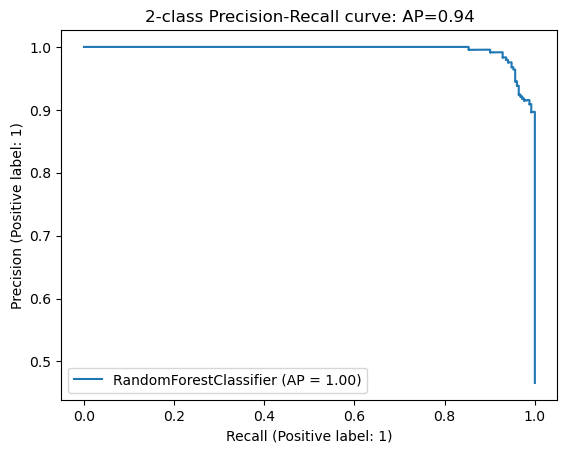

In [74]:
# Create a new Random Forest model with the optimal parameters
rf = RandomForestClassifier(n_estimators=300,
                            max_depth=10,
                            random_state=0)

# Fit the model
rf.fit(X_train, y_train)

# Predict the model
y_pred_rf = rf.predict(X_valid)

# Evaluate the model
print("Accuracy: ", accuracy_score(y_valid, y_pred_rf))
print("F1 score: ", f1_score(y_valid, y_pred_rf, average='weighted'))
print("Confusion matrix: ", confusion_matrix(y_valid, y_pred_rf))

# Precision and recall and Area under the curv

disp = plot_precision_recall_curve(rf, X_valid, y_valid)
disp.ax_.set_title('2-class Precision-Recall curve: '
                        'AP={0:0.2f}'.format(average_precision_score(y_valid, y_pred_rf)))              
# Area under the curve
average_precision = average_precision_score(y_valid, y_pred_rf)
print('Average precision-recall score: {0:0.2f}'.format(
        average_precision))

Random Forest Classifier is an extension of bagging classifier. It is a very powerful model. It gave an accuracy of 96% on the validation set which is an improvement over the previous model without cross validation.

Accuracy:  0.9353049907578558
F1 score:  0.935327626521316
Confusion matrix:  [[270  19]
 [ 16 236]]
Average precision-recall score: 0.90


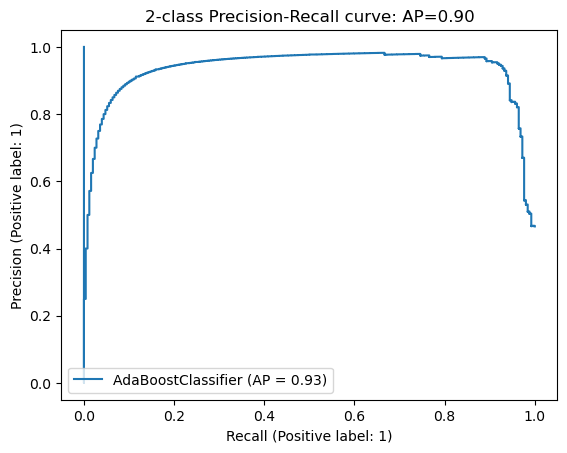

In [75]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

# fit the model
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(X_train, y_train)

# Predict the model
y_pred_ada = ada.predict(X_valid)

# Evaluate the model
print("Accuracy: ", accuracy_score(y_valid, y_pred_ada))
print("F1 score: ", f1_score(y_valid, y_pred_ada, average='weighted'))
print("Confusion matrix: ", confusion_matrix(y_valid, y_pred_ada))

# Precision and recall and Area under the curv

disp = plot_precision_recall_curve(ada, X_valid, y_valid)
disp.ax_.set_title('2-class Precision-Recall curve: '
                        'AP={0:0.2f}'.format(average_precision_score(y_valid, y_pred_ada))) 
# Area under the curve
average_precision = average_precision_score(y_valid, y_pred_ada)
print('Average precision-recall score: {0:0.2f}'.format(
        average_precision))

In [76]:
# implementing cross validation to find the best n_estimators and random_state using GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
}

# Create a based model
ada = AdaBoostClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# print the best parameters
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'n_estimators': 400, 'random_state': 0}
0.9306094182825485
AdaBoostClassifier(n_estimators=400, random_state=0)


In [45]:
print(grid_search.best_estimator_)

AdaBoostClassifier(n_estimators=400, random_state=0)


Accuracy:  0.944547134935305
F1 score:  0.9445322794487168
Confusion matrix:  [[275  14]
 [ 16 236]]
Average precision-recall score: 0.91


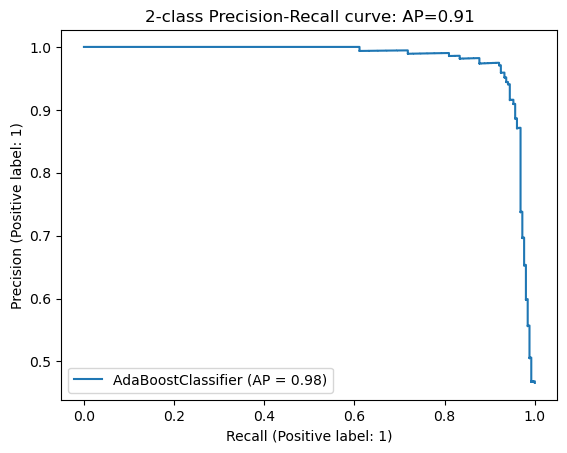

In [77]:
# Create a new AdaBoost model with the optimal parameters
ada = AdaBoostClassifier(n_estimators=400,
                            random_state=0)

# Fit the model
ada.fit(X_train, y_train)

# Predict the model
y_pred_ada = ada.predict(X_valid)

# Evaluate the model
print("Accuracy: ", accuracy_score(y_valid, y_pred_ada))
print("F1 score: ", f1_score(y_valid, y_pred_ada, average='weighted'))
print("Confusion matrix: ", confusion_matrix(y_valid, y_pred_ada))

# Precision and recall and Area under the curv

disp = plot_precision_recall_curve(ada, X_valid, y_valid)
disp.ax_.set_title('2-class Precision-Recall curve: '
                        'AP={0:0.2f}'.format(average_precision_score(y_valid, y_pred_ada)))                 
# Area under the curve
average_precision = average_precision_score(y_valid, y_pred_ada)
print('Average precision-recall score: {0:0.2f}'.format(
        average_precision))

AdaBoost Classifier is a boosting classifier. It is a very powerful model. It gave an accuracy of 94% on the validation set.

Accuracy:  0.922365988909427
F1 score:  0.9224277045432434
Confusion matrix:  [[264  25]
 [ 17 235]]
Average precision-recall score: 0.87


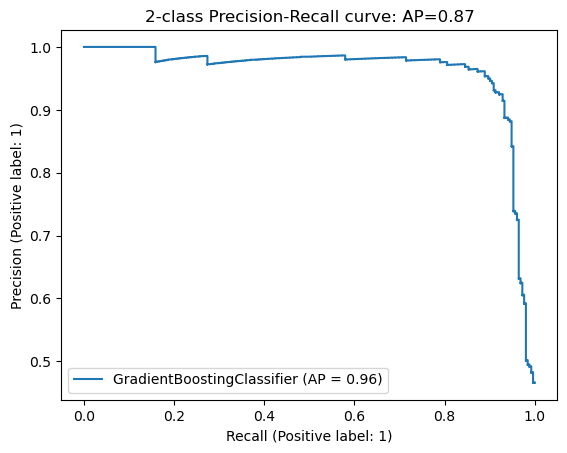

In [78]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

# fit the model
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gb.fit(X_train, y_train)

# Predict the model
y_pred_gb = gb.predict(X_valid)

# Evaluate the model
print("Accuracy: ", accuracy_score(y_valid, y_pred_gb))
print("F1 score: ", f1_score(y_valid, y_pred_gb, average='weighted'))
print("Confusion matrix: ", confusion_matrix(y_valid, y_pred_gb))

# Precision and recall and Area under the curv

disp = plot_precision_recall_curve(gb, X_valid, y_valid)
disp.ax_.set_title('2-class Precision-Recall curve: '
                        'AP={0:0.2f}'.format(average_precision_score(y_valid, y_pred_gb)))
# Area under the curve
average_precision = average_precision_score(y_valid, y_pred_gb)
print('Average precision-recall score: {0:0.2f}'.format(
        average_precision))

In [48]:
# implementing cross validation to find the best n_estimators, learning_rate, max_depth and random_state using GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
}

# Create a based model
gb = GradientBoostingClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# print the best parameters
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 3 folds for each of 5000 candidates, totalling 15000 fits
{'learning_rate': 0.5, 'max_depth': 7, 'n_estimators': 100, 'random_state': 2}
0.9583538524674259
GradientBoostingClassifier(learning_rate=0.5, max_depth=7, random_state=2)


In [49]:
print(grid_search.best_estimator_)
# GradientBoostingClassifier(learning_rate=0.5, max_depth=7, random_state=2)

GradientBoostingClassifier(learning_rate=0.5, max_depth=7, random_state=2)


Accuracy:  0.955637707948244
F1 score:  0.9556258235589734
Confusion matrix:  [[278  11]
 [ 13 239]]
Average precision-recall score: 0.93


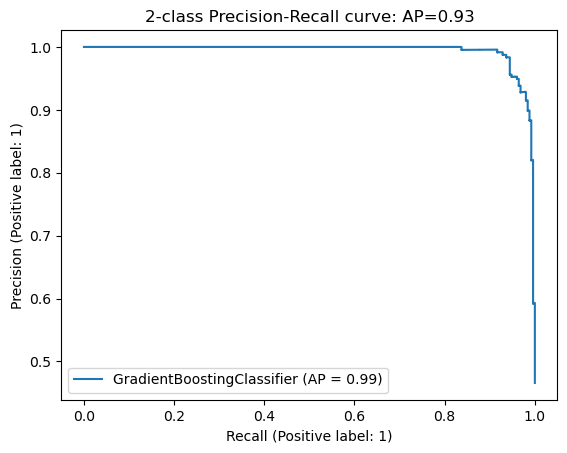

In [79]:
# Create a new Gradient Boosting model with the optimal parameters
gb = GradientBoostingClassifier(n_estimators=100,
                                learning_rate=0.5,        
                                max_depth=7,
                                random_state=2)

# Fit the model
gb.fit(X_train, y_train)

# Predict the model
y_pred_gb = gb.predict(X_valid)

# Evaluate the model
print("Accuracy: ", accuracy_score(y_valid, y_pred_gb))
print("F1 score: ", f1_score(y_valid, y_pred_gb, average='weighted'))
print("Confusion matrix: ", confusion_matrix(y_valid, y_pred_gb))

# Precision and recall and Area under the curv

disp = plot_precision_recall_curve(gb, X_valid, y_valid)
disp.ax_.set_title('2-class Precision-Recall curve: '
                        'AP={0:0.2f}'.format(average_precision_score(y_valid, y_pred_gb)))      
# Area under the curve
average_precision = average_precision_score(y_valid, y_pred_gb)
print('Average precision-recall score: {0:0.2f}'.format(
        average_precision))

Gradient Boosting Classifier is a boosting classifier. It is a very powerful model. It gave an accuracy of 95% on the validation set which is an improvement over the previous model without cross validation (92%).

### 4. Support Vector Machine Classifier

Accuracy:  0.9815157116451017
F1 score:  0.9815201510808478
Confusion matrix:  [[283   6]
 [  4 248]]
Average precision-recall score: 0.97


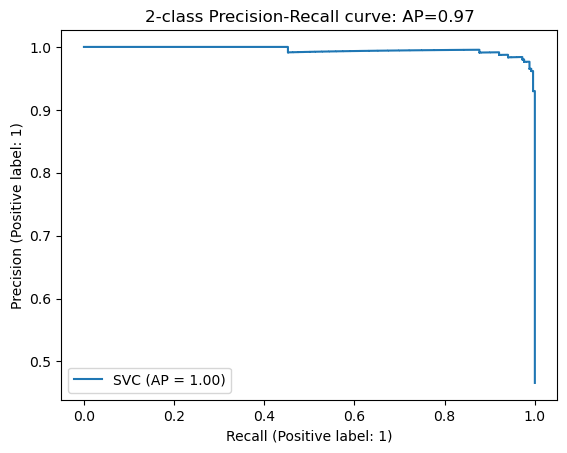

In [80]:
# SVM Classifier
from sklearn.svm import SVC

# fit the model
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)

# Predict the model
y_pred_svm = svm.predict(X_valid)

# Evaluate the model
print("Accuracy: ", accuracy_score(y_valid, y_pred_svm))
print("F1 score: ", f1_score(y_valid, y_pred_svm, average='weighted'))
print("Confusion matrix: ", confusion_matrix(y_valid, y_pred_svm))

# Precision and recall and Area under the curv

disp = plot_precision_recall_curve(svm, X_valid, y_valid)
disp.ax_.set_title('2-class Precision-Recall curve: '
                        'AP={0:0.2f}'.format(average_precision_score(y_valid, y_pred_svm))) 
# Area under the curve
average_precision = average_precision_score(y_valid, y_pred_svm)
print('Average precision-recall score: {0:0.2f}'.format(
        average_precision))

SVM (Support Vector Machine) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However, it is mostly used in classification problems. In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiate the two classes very well.

And from this, we can see that this model gave an accuracy of 98% on the validation set.

### 5. Comparison of the models

In [81]:
models = ['Naive Bayes', 'KNN', 'Bagging', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'SVM']
accuracy = [accuracy_score(y_valid, y_pred_gnb), accuracy_score(y_valid, y_pred_knn), accuracy_score(y_valid, y_pred_bagging), accuracy_score(y_valid, y_pred_rf), accuracy_score(y_valid, y_pred_ada), accuracy_score(y_valid, y_pred_gb), accuracy_score(y_valid, y_pred_svm)]

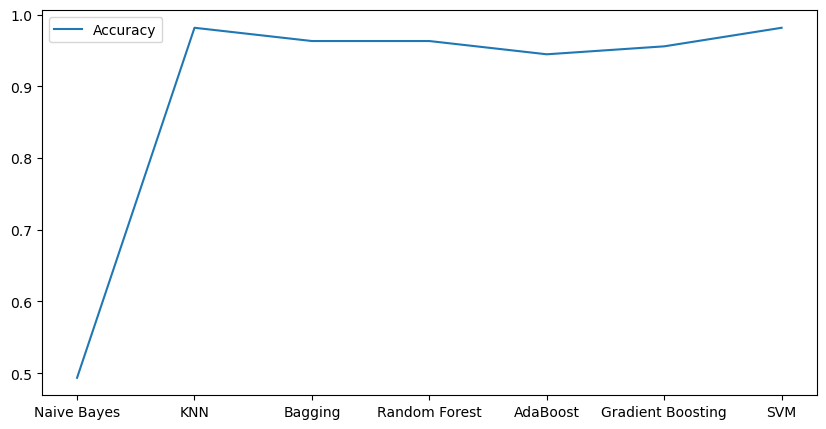

In [82]:
plt.figure(figsize=(10,5))
plt.plot(models, accuracy, label='Accuracy')
plt.legend()
plt.show()

In [83]:
accuracy

[0.49353049907578556,
 0.9815157116451017,
 0.9630314232902033,
 0.9630314232902033,
 0.944547134935305,
 0.955637707948244,
 0.9815157116451017]

Based on the accuracy of the models on validation data, K-Nearest Neighbors Classifier and SVM, both gave an accuracy of 98% which is impressive.

In [85]:
# Testing these models on test data
X_test = test_df.iloc[:, 1:]
y_test = test_df.iloc[:, 0]

# Scale the data
# scaler = StandardScaler()
# X_test = scaler.fit_transform(X_test)

# Naive Bayes
print("Naive Bayes")
y_pred_gnb = gnb.predict(X_test)

# Evaluate the model
print("Accuracy: ", accuracy_score(y_test, y_pred_gnb))
print("F1 score: ", f1_score(y_test, y_pred_gnb, average='weighted'))
print("Confusion matrix: ", confusion_matrix(y_test, y_pred_gnb))
print("***************************************")
# KNN
print("KNN")
y_pred_knn = knn.predict(X_test)

# Evaluate the model
print("Accuracy: ", accuracy_score(y_test, y_pred_knn))
print("F1 score: ", f1_score(y_test, y_pred_knn, average='weighted'))
print("Confusion matrix: ", confusion_matrix(y_test, y_pred_knn))
print("***************************************")
# Bagging
print("Bagging")
y_pred_bagging = bagging.predict(X_test)

# Evaluate the model
print("Accuracy: ", accuracy_score(y_test, y_pred_bagging))
print("F1 score: ", f1_score(y_test, y_pred_bagging, average='weighted'))
print("Confusion matrix: ", confusion_matrix(y_test, y_pred_bagging))
print("***************************************")
# Random Forest
print("Random Forest")
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Accuracy: ", accuracy_score(y_test, y_pred_rf))
print("F1 score: ", f1_score(y_test, y_pred_rf, average='weighted'))
print("Confusion matrix: ", confusion_matrix(y_test, y_pred_rf))
print("***************************************")
# AdaBoost
print("AdaBoost")
y_pred_ada = ada.predict(X_test)

# Evaluate the model
print("Accuracy: ", accuracy_score(y_test, y_pred_ada))
print("F1 score: ", f1_score(y_test, y_pred_ada, average='weighted'))
print("Confusion matrix: ", confusion_matrix(y_test, y_pred_ada))
print("***************************************")
# Gradient Boosting
print("Gradient Boosting")
y_pred_gb = gb.predict(X_test)

# Evaluate the model
print("Accuracy: ", accuracy_score(y_test, y_pred_gb))
print("F1 score: ", f1_score(y_test, y_pred_gb, average='weighted'))
print("Confusion matrix: ", confusion_matrix(y_test, y_pred_gb))
print("***************************************")
# SVM
print("SVM")
y_pred_svm = svm.predict(X_test)

# Evaluate the model
print("Accuracy: ", accuracy_score(y_test, y_pred_svm))
print("F1 score: ", f1_score(y_test, y_pred_svm, average='weighted'))
print("Confusion matrix: ", confusion_matrix(y_test, y_pred_svm))
print("***************************************")

Naive Bayes
Accuracy:  0.5277777777777778
F1 score:  0.5265700483091788
Confusion matrix:  [[61 41]
 [44 34]]
***************************************
KNN
Accuracy:  0.9833333333333333
F1 score:  0.9833453609864768
Confusion matrix:  [[100   2]
 [  1  77]]
***************************************
Bagging
Accuracy:  0.9777777777777777
F1 score:  0.977741352498634
Confusion matrix:  [[101   1]
 [  3  75]]
***************************************
Random Forest
Accuracy:  0.9833333333333333
F1 score:  0.9833202202989771
Confusion matrix:  [[101   1]
 [  2  76]]
***************************************
AdaBoost
Accuracy:  0.9611111111111111
F1 score:  0.9611391756351123
Confusion matrix:  [[98  4]
 [ 3 75]]
***************************************
Gradient Boosting
Accuracy:  0.9888888888888889
F1 score:  0.9888888888888889
Confusion matrix:  [[101   1]
 [  1  77]]
***************************************
SVM
Accuracy:  0.9777777777777777
F1 score:  0.9778084137527677
Confusion matrix:  [[99  3]


In [86]:
test_accuracy = [accuracy_score(y_test, y_pred_gnb), accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_bagging), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_ada), accuracy_score(y_test, y_pred_gb), accuracy_score(y_test, y_pred_svm)]

In [87]:
test_accuracy

[0.5277777777777778,
 0.9833333333333333,
 0.9777777777777777,
 0.9833333333333333,
 0.9611111111111111,
 0.9888888888888889,
 0.9777777777777777]

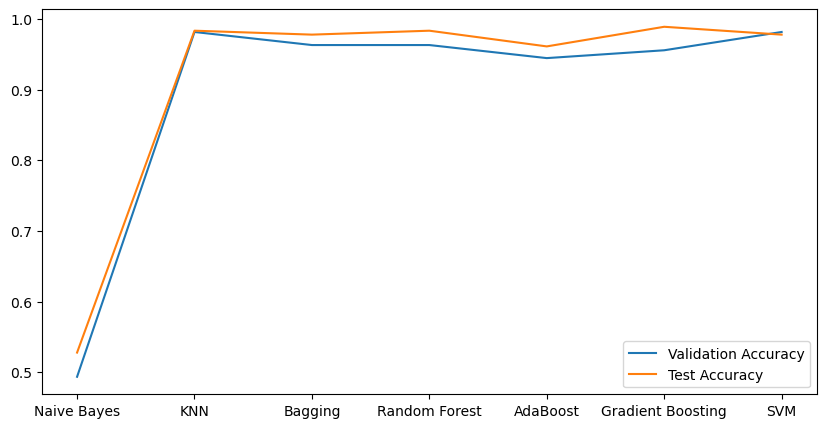

In [88]:
plt.figure(figsize=(10,5))
plt.plot(models, accuracy, label='Validation Accuracy')
plt.plot(models, test_accuracy, label='Test Accuracy')
plt.legend()
plt.show()

But, Gradient Boosting seems to produce better results than K-Nearest Neighbors Classifier and SVM on Testing Data. It gave an accuracy of 98% on the test set.

Its hard to say which model is better. Gradient Boosting Classifier and SVM both gave an accuracy of 98% on the validation set. But, Gradient Boosting Classifier gave an accuracy of 98% on the test set. So, we will be using Gradient Boosting Classifier for the task.